# MRI Tumor Classification Using CNN

**Author:** Rene Mazuela


## Problem Statement

The goal of this project is to develop a Convolutional Neural Network (CNN) to identify and classify types of brain tumors based on MRI images. The specific tumor classes included in this study are glioma, meningioma, pituitary tumors, and cases with no tumor. Brain tumor diagnosis is a critical task for medical professionals, often requiring expertise and time-consuming manual analysis of MRI images. This project aims to automate and enhance the accuracy of tumor detection, ultimately supporting healthcare professionals in making faster and more accurate diagnoses.

- **Context:** Brain tumors can be life-threatening, and early detection significantly improves patient outcomes. Traditional diagnostic methods are prone to variability in interpretation and require substantial resources.

- **Objective:** To create a reliable AI model that can classify MRI images into one of four categories: glioma, meningioma, pituitary tumors, or no tumor.

## Why is AI Relevant?
AI, particularly deep learning, is well-suited for image classification tasks due to its ability to learn complex patterns and features from large datasets.

This approach builds upon existing research in medical imaging and deep learning, but it uniquely focuses on combining advanced CNN architectures with domain-specific preprocessing to optimize classification performance.


# Data Acquisition / Ethical and Legal Implications

### Data Sources

- Origins: The MRI images used in this project are sourced from publicly available datasets, which provide labeled examples for glioma, meningioma, pituitary tumors, and no tumor cases.

- Nature: The dataset consists of grayscale MRI images, with each image labeled according to its respective class. The dataset is balanced across the four classes to ensure fairness and performance reliability.

### Ethical Considerations

- Bias in Data Representation: Efforts have been made to ensure that the dataset includes diverse patient demographics to avoid biased predictions.

- Impact on Vulnerable Groups: The model is designed to assist medical professionals, not replace them, ensuring that final diagnostic decisions remain under human oversight.

- Measures for Fairness: Data augmentation techniques are applied to mitigate class imbalances and improve model robustness.

### Legal Compliance

- Data Privacy: All data is anonymized to protect patient privacy, adhering to guidelines like HIPAA.

- Licensing: The dataset is used in compliance with its licensing agreements, ensuring proper acknowledgment of its sources.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import pathlib
import shutil
import matplotlib.pyplot as plt
import subprocess

In [ ]:
# Define distinct image classes
img_classes = ['glioma', 'meningioma', 'pituitary', 'notumor']

# Define paths for the training, testing, and validation subsets
dir_data = pathlib.Path.cwd().joinpath('data2')
dir_train = dir_data.joinpath('train')
dir_valid = dir_data.joinpath('validation')
dir_test = dir_data.joinpath('test')

# Configuration for Train/Test/Validation split
pct_train = 0.8
pct_valid = 0.1
pct_test = 0.1


def setup_folder_structure() -> None:
    # Create base directories
    for base_dir in [dir_data, dir_train, dir_valid, dir_test]:
        base_dir.mkdir(parents=True, exist_ok=True)

    # Create subdirectories for each class
    for cls in img_classes:
        (dir_train / cls).mkdir(parents=True, exist_ok=True)
        (dir_valid / cls).mkdir(parents=True, exist_ok=True)
        (dir_test / cls).mkdir(parents=True, exist_ok=True)

    # Print the structure of the directory
    dir_str = subprocess.check_output(
            '''ls -R data | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\\/]*\\//--/g' -e 's/^/   /' -e 's/-/|/' ''',
            shell=True,
            text=True
        )
    print(dir_str)

In [ ]:
setup_folder_structure()

In [ ]:
def train_test_validation_split(src_folder: pathlib.PosixPath, class_name: str) -> dict:
    # For tracking
    n_train, n_valid, n_test = 0, 0, 0

    # Random seed for reproducibility
    random.seed(42)

    # Iterate over every image
    for file in src_folder.iterdir():
        img_name = str(file).split('/')[-1]

        # Make sure it's JPG
        if file.suffix == '.jpg':
            # Generate a random number
            x = random.random()

            # Where should the image go?
            tgt_dir = ''

            # .80 or below
            if x <= pct_train:
                tgt_dir = 'train'
                n_train += 1

            # Between .80 and .90
            elif pct_train < x <= (pct_train + pct_valid):
                tgt_dir = 'validation'
                n_valid += 1

            # Above .90
            else:
                tgt_dir = 'test'
                n_test += 1

            # Copy the image
            shutil.copy(
                src=file,
                # data/<train|valid|test>/<cat\dog>/<something>.jpg
                dst=f'{str(dir_data)}/{tgt_dir}/{class_name}/{img_name}'
            )

    return {
        'source': str(src_folder),
        'target': str(dir_data),
        'n_train': n_train,
        'n_validaiton': n_valid,
        'n_test': n_test
    }

In [ ]:
# Splits train, test, and validation sets for all classes in the base folder.
def train_test_validation_split_all_classes(base_folder: pathlib.Path, img_classes: list):
    for class_name in img_classes:
        src_folder = base_folder.joinpath(class_name)
        print(f"Processing: {src_folder}")
        # Call your function for each class
        train_test_validation_split(src_folder=src_folder, class_name=class_name)

# Base folder for all classes
base_folder = pathlib.Path('drive/MyDrive/brain_tumors')


In [ ]:
%%time

train_test_validation_split_all_classes(base_folder, img_classes)

Processing: drive/MyDrive/brain_tumors/glioma
Processing: drive/MyDrive/brain_tumors/meningioma
Processing: drive/MyDrive/brain_tumors/pituitary
Processing: drive/MyDrive/brain_tumors/notumor
CPU times: user 2.16 s, sys: 2.29 s, total: 4.45 s
Wall time: 3min 41s


## Sample Images

In [ ]:
def plot_random_sample(img_dir: pathlib.PosixPath):
    # How many images we're showing
    n = 10
    # Get absolute paths to these N images
    imgs = random.sample(list(img_dir.iterdir()), n)

    # Make sure num_row * num_col = n
    num_row = 2
    num_col = 5

    # Create a figure
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = plt.imread(str(imgs[i]))
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        # Set title as <train|test|validation>/<cat\dog>/<img_name>.jpg
        ax.set_title('/'.join(str(imgs[i]).split('/')[-3:]))

    plt.tight_layout()
    plt.show()

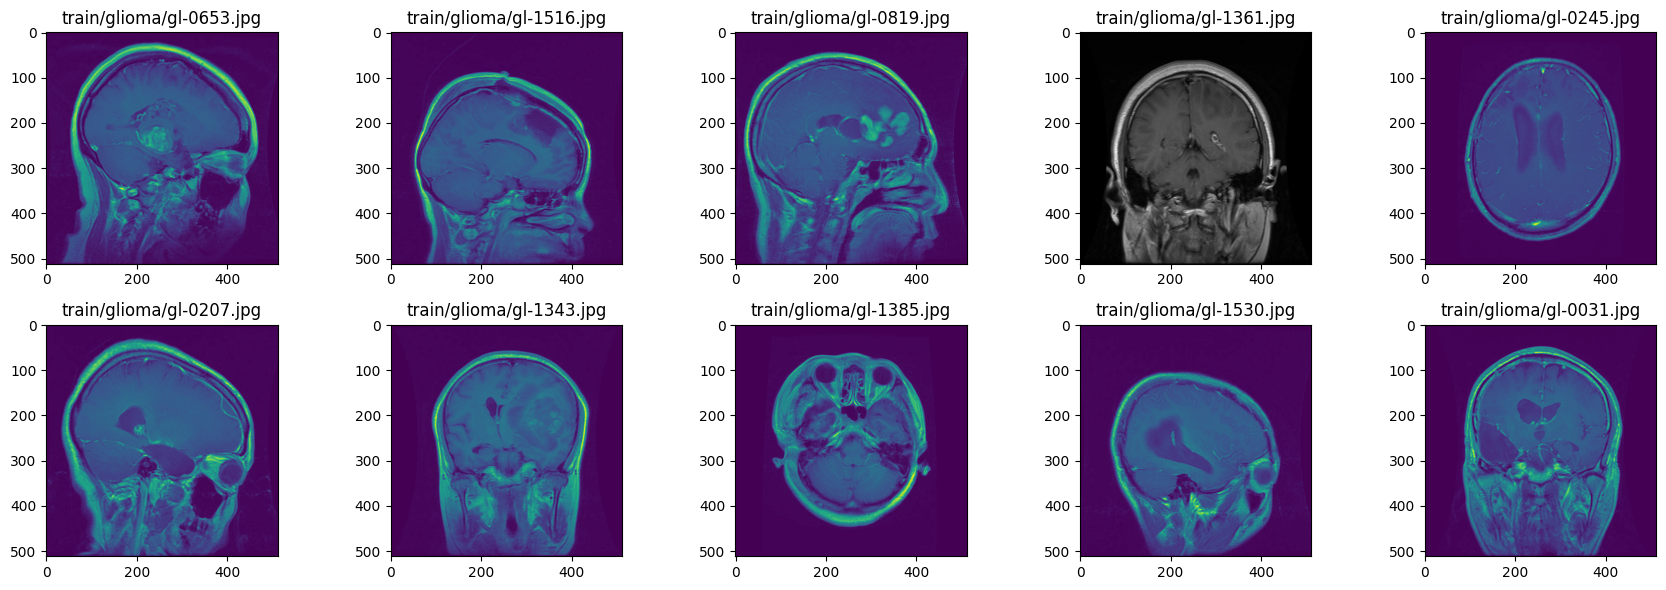

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data2/train/glioma'))

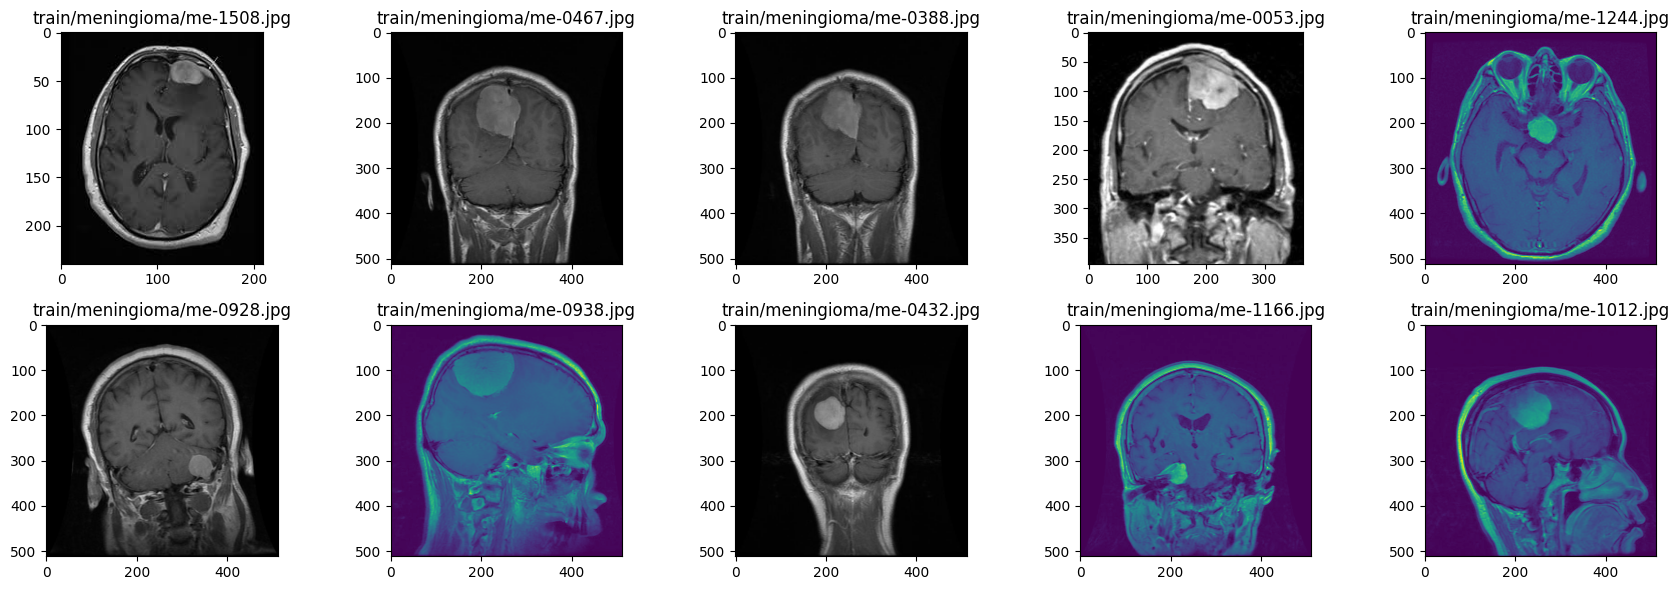

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data2/train/meningioma'))

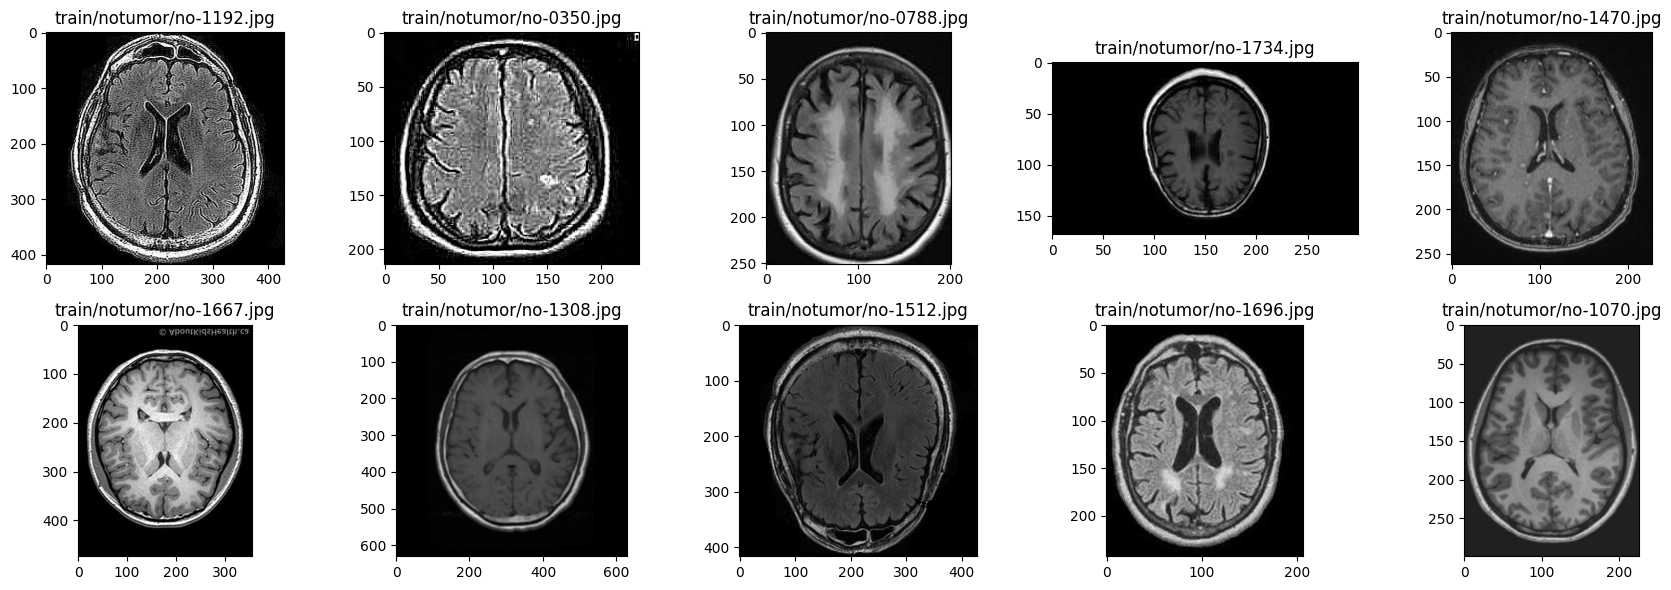

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data2/train/notumor'))

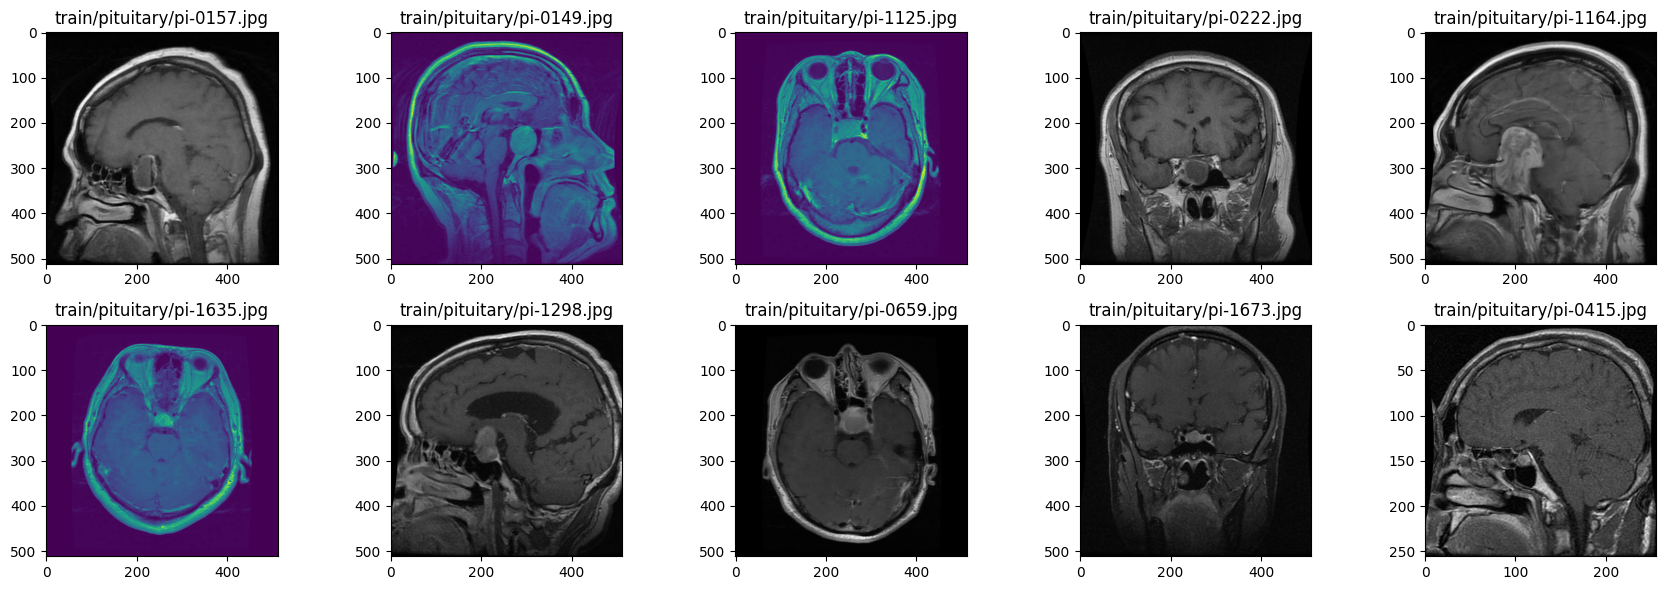

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data2/train/pituitary'))

# Data Preparation / Preprocessing

## Data Cleaning

Images were resized to a consistent resolution suitable for the CNN input layer. The following preprocessing pipeline was implemented Below. These steps ensure all input images are normalized and resized consistently to match the input requirements of the CNN model.

## Normalization

Pixel intensity values were normalized to the range [0, 1] to improve training stability.

## Feature Engineering

**Augmentation:** Techniques such as rotation, flipping, and zoom were applied to artificially expand the dataset and improve model generalization.

In [ ]:
import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define our base image directory
BASE_DIR  = "/content/data2"

# Define image size
IMG_SIZE = (224, 224)

# Define the Batch Size
BATCH_SIZE =  64

# Normalization layer
normalization_layer =  tf.keras.layers.Rescaling(scale = 1.0 / 255)


# Preprocess the images from out train/val/test datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = f"{BASE_DIR}/train",
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = f"{BASE_DIR}/validation",
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = f"{BASE_DIR}/test",
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

# Apply normalization to the train/val/test datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 5721 files belonging to 4 classes.
Found 742 files belonging to 4 classes.
Found 690 files belonging to 4 classes.


### Data Augmentation:

In [ ]:
# Augmentation increases dataset diversity, reducing overfitting.
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Apply augmentation to the training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

### Checking For corrupt images

Here we check for corrupt images in order to avoid errors during training
-  I did this due to running into some corrupt images during training initially. I left this here because if the notebook were to be run from the start and new image data happens to be added we can make sure there are not corrupt files and avoid the issue down the road.

In [ ]:
for split in ["train", "validation", "test"]:
    split_path = os.path.join(BASE_DIR, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = tf.keras.preprocessing.image.load_img(img_path)
            except Exception as e:
                print(f"Error loading image: {img_path}. Error: {e}")


### Visualizing Batch

In [ ]:
def visualize_batch(dataset, class_names, num_images=64):
    # Extract images and labels from the batch
    for images, labels in dataset.take(1):
        batch_size = len(images)
        num_images = min(num_images, batch_size)

        # Dynamically calculate grid size
        num_col = int(np.ceil(np.sqrt(num_images)))
        num_row = int(np.ceil(num_images / num_col))

        # Set up the figure
        fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
        axes = axes.flatten()  # Flatten axes to simplify indexing

        for i in range(num_images):
            ax = axes[i]
            img = images[i].numpy()
            img = (img * 255).astype("uint8")
            ax.imshow(img)
            ax.set_title(class_names[labels[i].numpy()])
            ax.axis("off")

        # Hide any unused axes
        for i in range(num_images, len(axes)):
            axes[i].axis("off")

        plt.tight_layout()
        plt.show()
        break

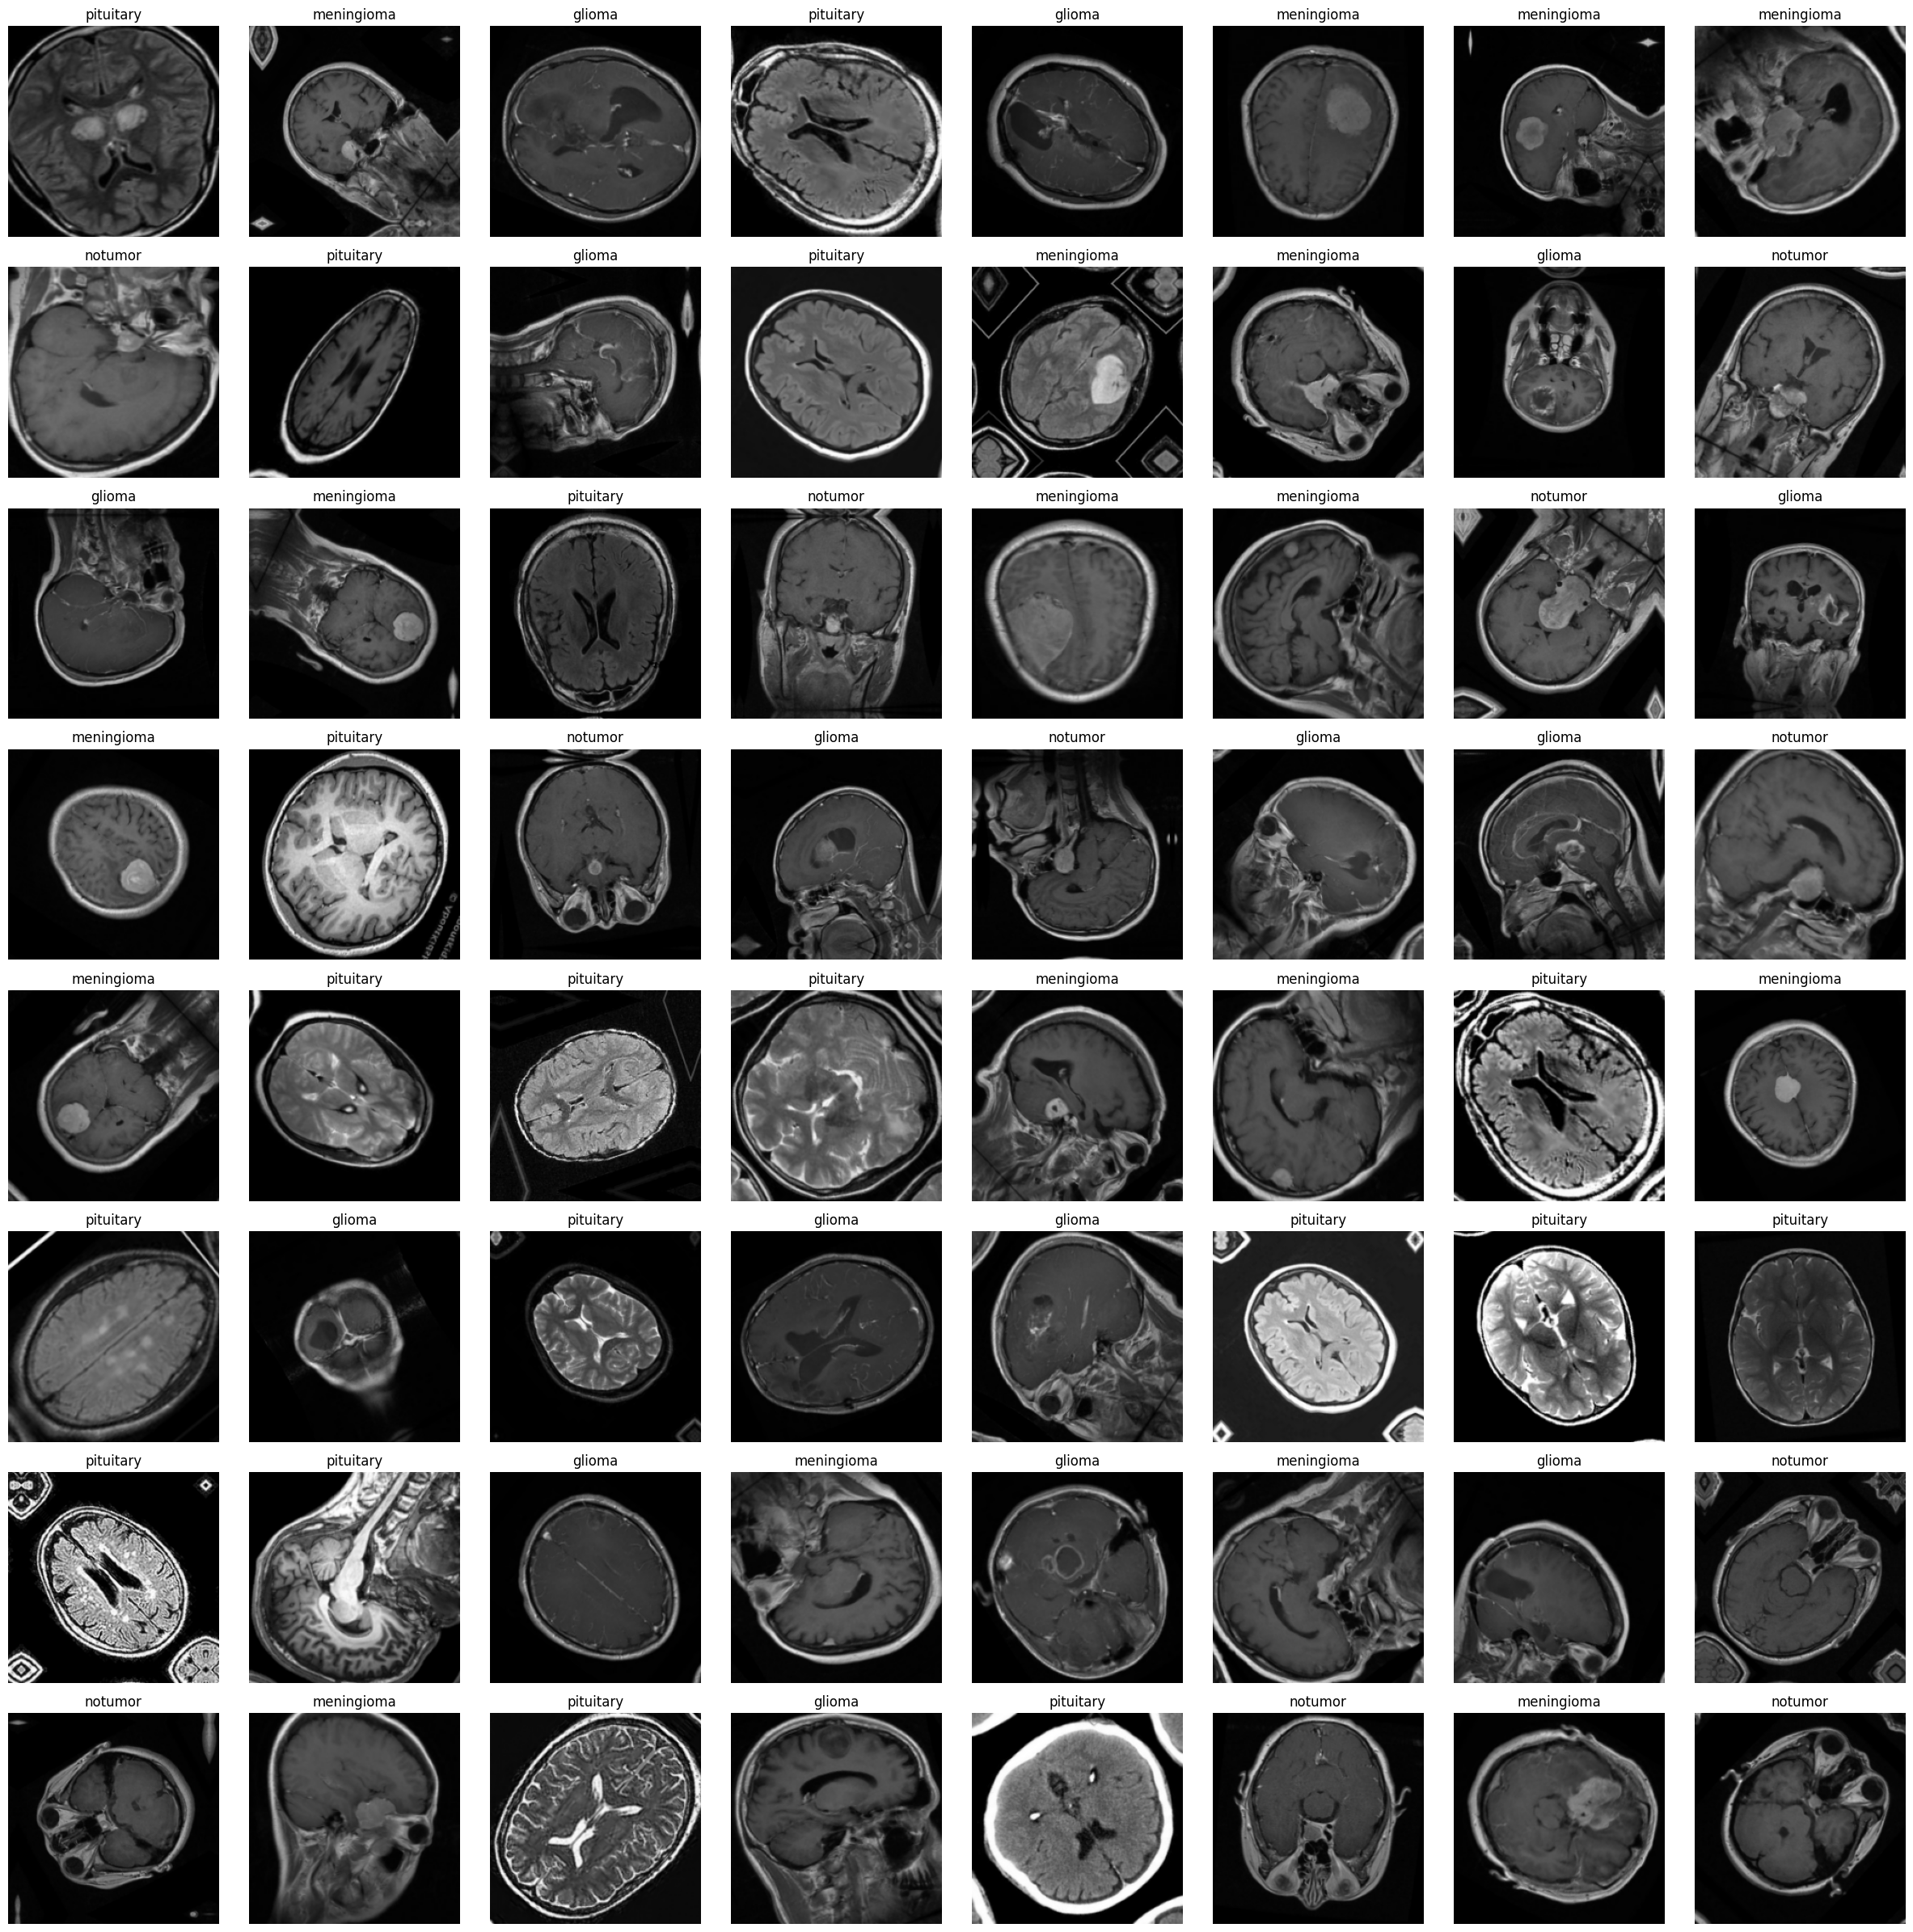

In [ ]:
class_names = ['glioma', 'meningioma', 'pituitary', 'notumor']

visualize_batch(train_ds, class_names, num_images=64)

# Model Building / Model Selection

## Algorithm Choices

**Selected Models**:

A custom Convolutional Neural Network (CNN) was designed specifically for this task. Additionally, architectures such as ResNet50 and EfficientNetB0 were included for comparison.

**Justification**:

The custom CNN was tailored to the specific characteristics of the MRI images, allowing for optimized feature extraction and classification.

EfficientNetB0 and ResNet50 were selected for their established performance in image classification tasks and ability to leverage pre-trained weights from ImageNet, which can accelerate convergence and potentially improve performance with transfer learning.

## Training and Validation

**Training Procedures:** The dataset was split into training, validation, and test sets using an 80-10-10 ratio. Data augmentation was applied to the training set to enhance model generalization.

**Validation Techniques:** Early stopping and cross-validation were employed to prevent overfitting and ensure model robustness.

**Performance Metrics:** Accuracy, precision, recall, and F1-score were used to evaluate the model.

### Helper Functions

In [ ]:
# We created this helper function to help us train our models.
def train_and_evaluate_model(model, train_ds, val_ds, test_ds, epochs=10):

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    # Train the model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        verbose=1
    )

    # Evaluate the model on the test dataset
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)

    print(f"Test Accuracy: {test_accuracy:.2f}")
    return {"history": history, "test_accuracy": test_accuracy}


# Extended evaluation for precision, recall, and F1-score
def evaluate_with_metrics(model, test_ds, class_names):
    y_pred = []
    y_true = []

    for images, labels in test_ds:
        # Ensure predictions are probabilities (apply softmax if needed)
        predictions = model.predict(images)
        probabilities = tf.nn.softmax(predictions, axis=1).numpy()
        y_pred.extend(tf.argmax(probabilities, axis=1).numpy())
        y_true.extend(labels.numpy())

    # Verify that the class mapping aligns with target_names
    assert len(class_names) == len(set(y_true)), "Class names do not match the number of classes in labels."

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)
    return report


In [ ]:
# Extended evaluation for precision, recall, and F1-score
def evaluate_with_metrics(model, test_ds, class_names):
    y_pred = []
    y_true = []

    for images, labels in test_ds:
        # Ensure predictions are probabilities (apply softmax if needed)
        predictions = model.predict(images)
        probabilities = tf.nn.softmax(predictions, axis=1).numpy()
        y_pred.extend(tf.argmax(probabilities, axis=1).numpy())
        y_true.extend(labels.numpy())

    # Verify that the class mapping aligns with target_names
    assert len(class_names) == len(set(y_true)), "Class names do not match the number of classes in labels."

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)
    return report

In [ ]:
def extract_features(dataset, model):
    features, labels = [], []
    for images, lbls in dataset:
        # Directly pass batches to the model
        feats = model(images, training=False)  # Disable training mode
        features.append(feats.numpy())
        labels.append(lbls.numpy())
    return np.vstack(features), np.hstack(labels)


In [ ]:
# Here we declare our class names for the evaluation.
class_names = ["glioma", "meningioma", "pituitary", "notumor"]

### Creating the initial models

In [ ]:
# Custom CNN Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=IMG_SIZE + (3,), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# EfficientNetB0 Model
efficientnet_model = tf.keras.Sequential([
    tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# ResNet50 Model
resnet_model = tf.keras.Sequential([
    tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### Training and Evaluating the models

In [ ]:
# Train and Evaluate Models
print("Training Custom CNN...")
custom_cnn_results = train_and_evaluate_model(model_1, train_ds, val_ds, test_ds, epochs=10)

Training Custom CNN...
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - loss: 2.1847 - sparse_categorical_accuracy: 0.3792 - val_loss: 0.9417 - val_sparse_categorical_accuracy: 0.5943
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 86s 954ms/step - loss: 0.9707 - sparse_categorical_accuracy: 0.6041 - val_loss: 0.8860 - val_sparse_categorical_accuracy: 0.6065
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 950ms/step - loss: 0.8674 - sparse_categorical_accuracy: 0.6649 - val_loss: 1.0792 - val_sparse_categorical_accuracy: 0.5216
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 949ms/step - loss: 0.8057 - sparse_categorical_accuracy: 0.6830 - val_loss: 0.7728 - val_sparse_categorical_accuracy: 0.6631
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - loss: 0.7816 - sparse_categorical_accuracy: 0.6883 - val_loss: 0.8058 - val_sparse_categorical_accuracy: 0.6590
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 129s 956ms/step - loss: 0.7579 - sparse_categorical_accuracy: 0.6982 - val_loss: 0.7431 - val_sparse_categ

In [ ]:
# Classification Report for Our CNN
print("Evaluating Custom CNN with extended metrics...")
custom_cnn_report = evaluate_with_metrics(model_1, test_ds, class_names)

Evaluating Custom CNN with extended metrics...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
               precision    recall  f1-score   support

      glioma       0.72      0.47      0.57       156
  meningioma       0.68      0.48      0.56       170
   pituitary       0.70      0.98      0.81       196
     notumor       0.70      0.80      0.74       168

    accuracy                           0.70       690
   macro avg       0.70      0.68      0.67       690
weighted avg       0.70      0.70      0.68       690



In [ ]:
print("Training EfficientNetB0...")
efficientnet_results = train_and_evaluate_model(efficientnet_model, train_ds, val_ds, test_ds, epochs=10)

Training EfficientNetB0...
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - loss: 0.5498 - sparse_categorical_accuracy: 0.7844 - val_loss: 5.5096 - val_sparse_categorical_accuracy: 0.2736
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - loss: 0.2142 - sparse_categorical_accuracy: 0.9295 - val_loss: 4.1087 - val_sparse_categorical_accuracy: 0.2332
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9488 - val_loss: 7.4924 - val_sparse_categorical_accuracy: 0.2736
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - loss: 0.1224 - sparse_categorical_accuracy: 0.9642 - val_loss: 6.8332 - val_sparse_categorical_accuracy: 0.2466
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - loss: 0.1258 - sparse_categorical_accuracy: 0.9614 - val_loss: 5.0010 - val_sparse_categorical_accuracy: 0.3235
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - loss: 0.0962 - sparse_categorical_accuracy: 0.9673 - val_loss: 3.6238 - val_sparse_categorical_acc

In [ ]:
# Classification report for EfficientNetB0
print("Evaluating EfficientNetB0 with extended metrics...")
efficientnet_report = evaluate_with_metrics(efficientnet_model, test_ds, class_names)

Evaluating EfficientNetB0 with extended metrics...
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Classification Report:
               precision    recall  f1-score   support

      glioma       0.23      1.00      0.37       156
  meningioma       0.00      0.00      0.00       170
   pituitary       0.00      0.00      0.00       196
     notumor       0.00      0.00      0.00       168

    accuracy                           0.23       690
   macro avg       0.06      0.25      0.09       690
weighted avg       0.05      0.23      0.08       690



In [ ]:
print("Training ResNet50...")
resnet_results = train_and_evaluate_model(resnet_model, train_ds, val_ds, test_ds, epochs=10)

Training ResNet50...
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - loss: 0.7503 - sparse_categorical_accuracy: 0.7319 - val_loss: 7.7283 - val_sparse_categorical_accuracy: 0.2466
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - loss: 0.3684 - sparse_categorical_accuracy: 0.8831 - val_loss: 1.8809 - val_sparse_categorical_accuracy: 0.3181
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - loss: 0.2536 - sparse_categorical_accuracy: 0.9138 - val_loss: 4.2984 - val_sparse_categorical_accuracy: 0.2736
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - loss: 0.2367 - sparse_categorical_accuracy: 0.9211 - val_loss: 5.5779 - val_sparse_categorical_accuracy: 0.2183
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - loss: 0.1965 - sparse_categorical_accuracy: 0.9390 - val_loss: 1.3921 - val_sparse_categorical_accuracy: 0.3221
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - loss: 0.2125 - sparse_categorical_accuracy: 0.9274 - val_loss: 8.5254 - val_sparse_categorical_accura

In [ ]:
# Classification report for ResNet50
print("Evaluating ResNet50 with extended metrics...")
resnet_report = evaluate_with_metrics(resnet_model, test_ds, class_names)

Evaluating ResNet50 with extended metrics...
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Classification Report:
               precision    recall  f1-score   support

      glioma       0.00      0.00      0.00       156
  meningioma       0.25      1.00      0.40       170
   pituitary       1.00      0.01      0.01       196
     notumor       0.00      0.00      0.00       168

    accuracy                           0.25       690
   macro avg       0.31      0.25      0.10       690
weighted avg       0.34      0.25      0.10       690



# Improving the Results

This section outlines the iterative improvements applied to enhance the model's performance by using several methods explained below

## Initial Improvements

Deeper Network Design:

A deeper network was implemented to improve the model's capacity to capture complex patterns. By adding additional convolutional layers, the accuracy improved significantly from 70% to 84%.

The deeper network consists of four convolutional layers with increasing filter sizes, followed by a dense layer for classification. Dropout was used to mitigate overfitting.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Here we add more convolutional layers to make the Netowrk deeper to see if we can capture more complex patterns.
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=IMG_SIZE + (3,), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [ ]:
print("Training Custom CNN...")
custom_cnn_results = train_and_evaluate_model(model_2, train_ds, val_ds, test_ds, epochs=10)

Training Custom CNN...
Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - loss: 1.3969 - sparse_categorical_accuracy: 0.3681 - val_loss: 1.0821 - val_sparse_categorical_accuracy: 0.4906
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 86s 948ms/step - loss: 0.9319 - sparse_categorical_accuracy: 0.6110 - val_loss: 0.9859 - val_sparse_categorical_accuracy: 0.5701
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 941ms/step - loss: 0.8166 - sparse_categorical_accuracy: 0.6769 - val_loss: 0.7258 - val_sparse_categorical_accuracy: 0.7116
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 84s 925ms/step - loss: 0.7165 - sparse_categorical_accuracy: 0.7146 - val_loss: 0.7633 - val_sparse_categorical_accuracy: 0.6833
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 84s 921ms/step - loss: 0.6524 - sparse_categorical_accuracy: 0.7364 - val_loss: 0.7503 - val_sparse_categorical_accuracy: 0.7089
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 923ms/step - loss: 0.6067 - sparse_categorical_accuracy: 0.7559 - val_loss: 0.6962 - val_sparse_categ

## Further Improvements

Further improvements were achieved by incorporating Squeeze-and-Excitation (SE) blocks and attention mechanisms to focus on critical features in the MRI images.

Training optimizations included using a learning rate scheduler, early stopping, and class weight balancing to handle slight imbalances in the dataset. These enhancements elevated accuracy from 84% to 96%.

### Updated Training Function
This training function optimizes model training by incorporating a learning rate scheduler for gradual learning rate decay and early stopping to prevent overfitting. It compiles the model with the Adam optimizer, sparse categorical cross-entropy loss, and sparse categorical accuracy as the metric. Additionally, it supports class weighting for imbalanced datasets and evaluates the model on the test dataset after training.

In [ ]:
# We created this helper function to help us train our models.
def train_and_evaluate_model_op(
    model, train_ds, val_ds, test_ds, class_weights=None, epochs=50
):
    # Learning Rate Scheduler
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=10000,
        decay_rate=0.9,
        staircase=True
    )

    # Early Stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_sparse_categorical_accuracy',
        patience=5,
        restore_best_weights=True
    )

    # Compile the model with the learning rate schedule
    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr_schedule),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    # Train the model with callbacks
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stopping],
        class_weight=class_weights
    )

    # Evaluate the model on the test dataset
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)

    print(f"Test Accuracy: {test_accuracy:.2f}")
    return {"history": history, "test_accuracy": test_accuracy}


### Adding an Attention Layer (SE Block)
Adding an Attention Layer (Squeeze-and-Excitation Block) is an effective method for improving the performance of CNN models by allowing the network to focus on the most important features. The SE block introduces a lightweight attention mechanism that adaptively recalibrates feature maps by emphasizing informative features and suppressing less useful ones.

Below are the sources I referred to for understanding and implementing SE blocks.

###Sources:
Squeeze-and-Excitation block explained:

https://medium.com/@tahasamavati/squeeze-and-excitation-explained-387b5981f249

Attention is all you need:

https://arxiv.org/pdf/1706.03762

Squeeze-and-Excitation Networks:

https://arxiv.org/pdf/1709.01507

In [ ]:
class SEBlock(tf.keras.layers.Layer):
    def __init__(self, filters, ratio=16, **kwargs):
        super(SEBlock, self).__init__(**kwargs)
        self.filters = filters
        self.ratio = ratio
        self.global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.dense_1 = tf.keras.layers.Dense(filters // ratio, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(filters, activation='sigmoid')
        self.reshape = tf.keras.layers.Reshape((1, 1, filters))

    def call(self, input_tensor, training=False):
        # Squeeze
        se = self.global_avg_pool(input_tensor)
        se = self.dense_1(se)
        se = self.dense_2(se)

        # Excitation
        se = self.reshape(se)
        se = tf.keras.layers.Multiply()([input_tensor, se])
        return se


In [ ]:
model_optimized_v2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=IMG_SIZE + (3,), kernel_initializer='he_normal'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    SEBlock(filters=32),

    tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    SEBlock(filters=64),

    tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [ ]:
# Train and Evaluate Models
print("Training Custom CNN...")
custom_cnn_results = train_and_evaluate_model_op(model_optimized_v2, train_ds, val_ds, test_ds, epochs=100)

Training Custom CNN...
Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - loss: 1.4006 - sparse_categorical_accuracy: 0.4104 - val_loss: 0.8083 - val_sparse_categorical_accuracy: 0.6792
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 86s 954ms/step - loss: 0.8001 - sparse_categorical_accuracy: 0.6769 - val_loss: 0.7344 - val_sparse_categorical_accuracy: 0.7251
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 969ms/step - loss: 0.6862 - sparse_categorical_accuracy: 0.7307 - val_loss: 0.7130 - val_sparse_categorical_accuracy: 0.7251
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 962ms/step - loss: 0.6002 - sparse_categorical_accuracy: 0.7581 - val_loss: 0.5660 - val_sparse_categorical_accuracy: 0.7642
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 966ms/step - loss: 0.5194 - sparse_categorical_accuracy: 0.8034 - val_loss: 0.5119 - val_sparse_categorical_accuracy: 0.7884
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 142s 971ms/step - loss: 0.4913 - sparse_categorical_accuracy: 0.8067 - val_loss: 0.3791 - val_spars

In [ ]:
# Classification Report for Our CNN
print("Evaluating Custom CNN with extended metrics...")
custom_cnn_report = evaluate_with_metrics(model_optimized_v2, test_ds, class_names)

Evaluating Custom CNN with extended metrics...
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 90s 90s/step
Classification Report:
               precision    recall  f1-score   support

      glioma       0.91      0.95      0.93       156
  meningioma       0.96      0.90      0.93       170
   pituitary       0.96      1.00      0.98       196
     notumor       1.00      0.98      0.99       168

    accuracy                           0.96       690
   macro avg       0.96      0.96      0.96       690
weighted avg       0.96      0.96      0.96       690



#  Further Potential for Improvement

**Advanced Architectures**: Experiment with transformers or hybrid CNN-transformer models to capture global and local patterns simultaneously.

**Data Augmentation**: Utilize more sophisticated augmentation techniques like CutMix or MixUp to enhance data diversity.

**Ensemble Models**: Combine predictions from multiple models using ensemble techniques to further improve robustness.

# Using the trained model with a simple UI

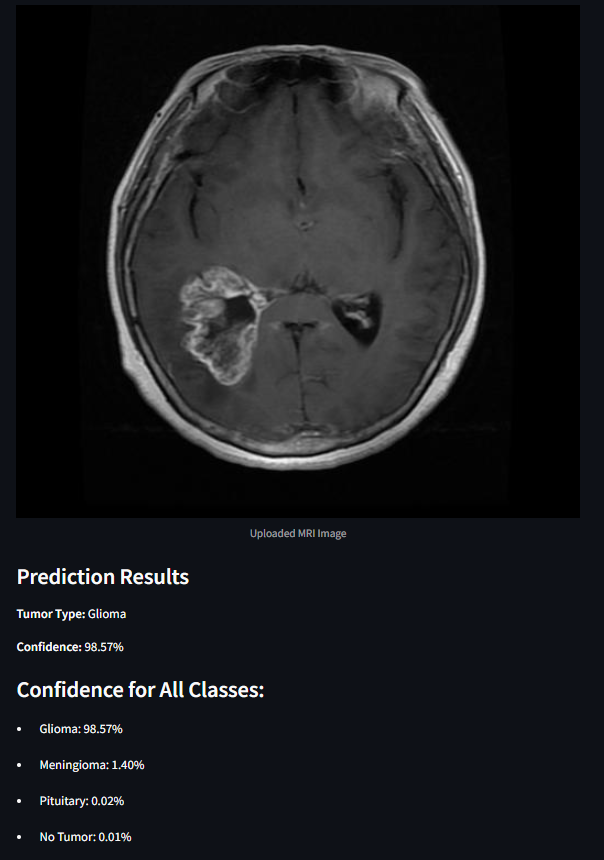

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Constants
IMG_SIZE = (224, 224)
CLASS_NAMES = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

# Load the trained model
@st.cache(allow_output_mutation=True)
def load_trained_model():
    model = load_model('model_2.h5')  # Ensure the model file is uploaded to Colab
    return model

class SEBlock(tf.keras.layers.Layer):
    def __init__(self, filters, ratio=16, **kwargs):
        super(SEBlock, self).__init__(**kwargs)
        self.filters = filters
        self.ratio = ratio
        self.global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.dense_1 = tf.keras.layers.Dense(filters // ratio, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(filters, activation='sigmoid')

    def call(self, input_tensor, training=False):
        se = self.global_avg_pool(input_tensor)
        se = self.dense_1(se)
        se = self.dense_2(se)
        se = tf.keras.layers.Multiply()([input_tensor, se])
        return se


# Predict tumor type
def predict_tumor_type(image_path, model):
    image = load_img(image_path, target_size=IMG_SIZE)
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    predictions = model.predict(image_array)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class] * 100

    return predicted_class, confidence, predictions

# Streamlit UI
st.title("MRI Tumor Classification")
st.write("Upload an MRI image to predict the type of tumor.")

# File uploader
uploaded_file = st.file_uploader("Upload MRI Image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    with open("temp_image.png", "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.image("temp_image.png", caption="Uploaded MRI Image", use_column_width=True)

    model = load_trained_model()

    predicted_class, confidence, predictions = predict_tumor_type("temp_image.png", model)

    st.subheader("Prediction Results")
    st.write(f"**Tumor Type:** {CLASS_NAMES[predicted_class]}")
    st.write(f"**Confidence:** {confidence:.2f}%")

    st.write("### Confidence for All Classes:")
    for i, class_name in enumerate(CLASS_NAMES):
        st.write(f"- {class_name}: {predictions[i] * 100:.2f}%")


Writing app.py


In [ ]:
from pyngrok import ngrok
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.209.212:8501

⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://all-plums-search.loca.lt
2024-12-07 15:37:40.906414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 15:37:40.939583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 15:37:40.946688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 15:37:40.962853: I te